In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1
beta = 1
gamma = 2
T_E = 10
T_I = 10
W_EE = 1.5
W_EI = 1.8
W_IE = 1.8
W_II = 1
dt = 0.1

def phi(x):
    if x > 0:
        return beta*x**gamma
    else:
        return 0*x

x = np.arange(-500,500)
plt.plot(x, phi(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [16]:
def model(r_E, r_I, u_E, u_I):
    drEdt = (-r_E + phi(W_EE*r_E - W_EI*r_I + u_E))/T_E
    drIdt = (-r_I + phi(W_IE*r_E - W_II*r_I + u_I))/T_I
    return [drEdt, drIdt]

def simulate(t, u_E, u_I, h, r_E_in=0, r_I_in=0, update_i=True, update_e=True):
    r_E = np.zeros(len(t))
    r_I = np.zeros(len(t))

    r_E[0] = r_E_in
    r_I[0] = r_I_in
    for i in range(1, len(t)):
        drEdt, drIdt = model(r_E[i-1], r_I[i-1], u_E=u_E, u_I=u_I)

        if update_i:
            r_E[i] = r_E[i-1] + drEdt * h
        else:
            r_E[i] = r_E[i-1]

        if update_e:
            r_I[i] = r_I[i-1] + drIdt * h
        else:
            r_I[i] = r_I[i-1]

    return r_E, r_I

# Question 2
u_E = 1
u_I = 1

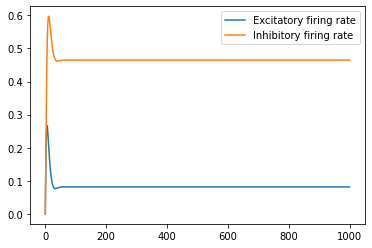

In [29]:
# Question 2
N_t = 1000
t = np.linspace(0, N_t, int(N_t/dt)+1)
r_E, r_I = simulate(t=t,
                    u_E=u_E,
                    u_I=u_I,
                    h=dt)

plt.plot(t, r_E, label='Excitatory firing rate')
plt.plot(t, r_I, label='Inhibitory firing rate')
plt.legend()
plt.savefig('figures/task2/question2.pdf')

In [33]:
# Question 3
c_range = np.arange(0, 3, 0.1)
E_steady_states = []
I_steady_states = []
for c in c_range:
    u_E = c
    u_I = c
    r_E, r_I = simulate(t=t,
                        u_E=u_E,
                        u_I=u_I,
                        h=dt)
    E_steady_states.append(r_E[-1])
    I_steady_states.append(r_I[-1])

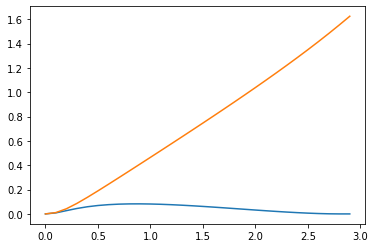

In [36]:
plt.plot(c_range, E_steady_states)
plt.plot(c_range, I_steady_states)
